# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hendrawan Aulia Rahman
- **Email:** hendrawanar67@gmail.com
- **ID Dicoding:** Hendrawan Aulia Rahman

## Menentukan Pertanyaan Bisnis

- Bagaimana peningkatan rental sepeda dari tahun 2011 sampai tahun 2012?
- Bagaimana pengaruh Musim terhadap pengaruh rental sepeda?


## Import Semua Packages/Library yang Digunakan

In [49]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [50]:
data_path = f"{path}/day.csv"  # ganti dengan nama file yang sesuai

# Baca file CSV
df = pd.read_csv(data_path)

# Tampilkan beberapa baris pertama dari dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


**Insight:**
- Data terdiri dari 16 kolom
- Data bertipe integer dan float kecuali untuk tanggal yang bertipe objek atau string

### Assessing Data

In [52]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [53]:
df.duplicated().sum()

0

In [54]:
q25, q75 = np.percentile(df['cnt'], 25), np.percentile(df['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['cnt'] if x < minimum or x > maximum]

In [55]:
print(outliers)

[]


**Insight:**
- Tidak ada missing value dalam data tersebut
- Tidak ada duplicate value dalam data tersebut
- Tidak ada outliers


### Cleaning Data

In [56]:
# Konversi kolom 'dteday' ke tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Ekstrak tahun dan bulan dari 'dteday'
df['year_month'] = df['dteday'].dt.to_period('M')


**Insight:**
- Mengkonversi tipe data pada tanggal ke tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [57]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  year_month  731 non-null  

In [59]:
df['dteday'].nunique()

731

In [60]:
# Mengkelompokan data bersadarkan year_month
df2 = df.groupby('year_month')['cnt'].sum().reset_index()
df2.sort_values(by='cnt',ascending=False)

,year_month,cnt
20,2012-09,218573
19,2012-08,214503
18,2012-07,203607
17,2012-06,202830
21,2012-10,198841
16,2012-05,195865
15,2012-04,174224
14,2012-03,164875
22,2012-11,152664
5,2011-06,143512


In [61]:
# Mengkelompokan data bersadarkan musim
df3 = df.groupby('season')['cnt'].sum().reset_index()
df3.sort_values(by='cnt',ascending=False)

,season,cnt
2,3,1061129
1,2,918589
3,4,841613
0,1,471348


In [68]:
#Mengelompokan data berdasrkan cuaca
df4 = df.groupby(by="weathersit").agg({
    "cnt": "sum",
    "dteday": "count"
}).reset_index()
df4['rata rata'] = df4['cnt'] / df4['dteday']
df4 = df4.sort_values(by='cnt',ascending=False)
df4

,weathersit,cnt,dteday,rata rata
0,1,2257952,463,4876.786177
1,2,996858,247,4035.862348
2,3,37869,21,1803.285714


In [70]:
presentase_cuaca_cerah = df4['cnt'][0]/ df4['cnt'].sum() * 100
presentase_cuaca_cerah

68.5749203004605

In [71]:
# Mengkelompokan data bersadarkan year_month
df5 = df.groupby('holiday')['cnt'].sum().reset_index()
df5.sort_values(by='cnt',ascending=False)


,holiday,cnt
0,0,3214244
1,1,78435


In [72]:
presentase_hari_kerja = df5['cnt'][0]/ df5['cnt'].sum() * 100
presentase_hari_kerja

97.6178971591218

**Insight:**
- Panjang Data Frame adalah 731
- Rata rata jumlah sewa sepeda perhari adalah 4504
- Total rental sepeda terbanyak terdapat pada bulan September 2012 dengan 218.573 sewa
- Total rental sepeda terbanyak terdapat pada musim gugur
- 68,5% rental sepeda terjadi pada cuaca cerah (clear)
- Rata rata jumlah rental sepeda pada cuaca cerah adalah 4877
- 97,6% rental sepeda terjadi pada hari kerja (non holiday)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

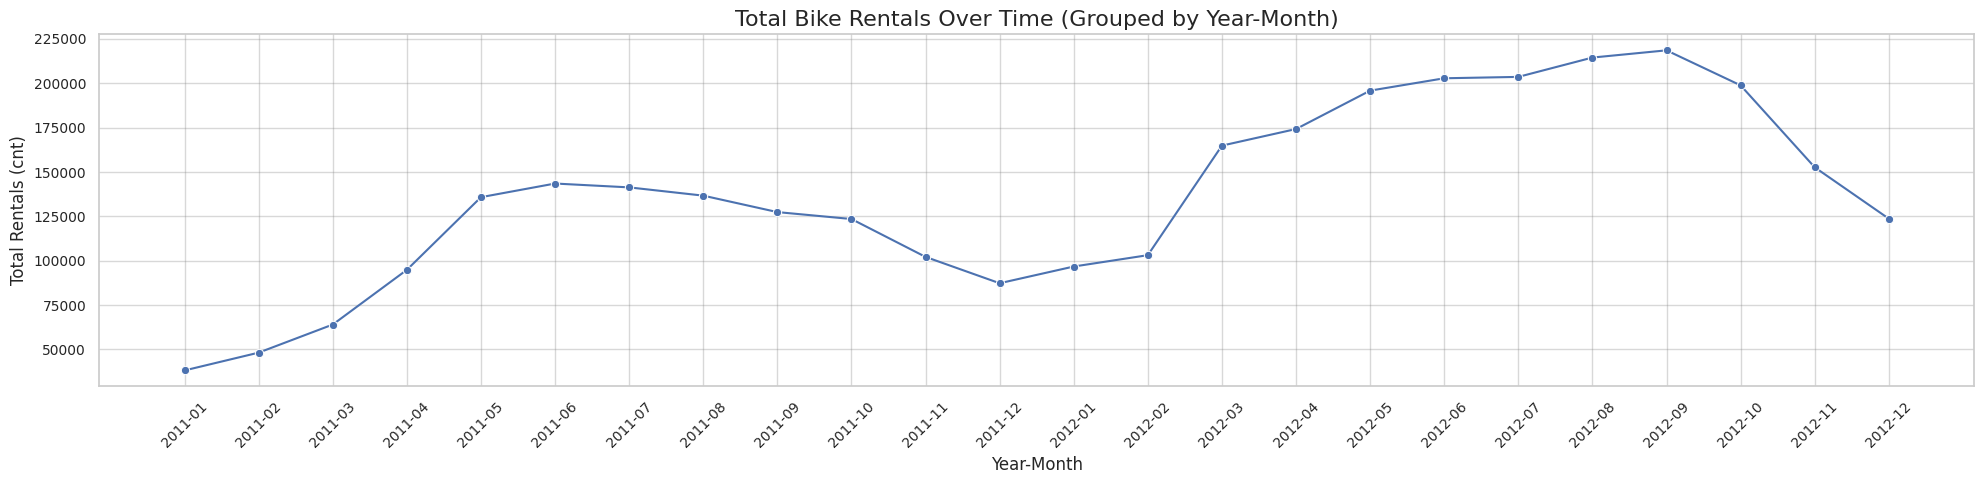

In [73]:

# Menggunakan Seaborn untuk membuat line plot
plt.figure(figsize=(20, 5))
sns.lineplot(x=df2['year_month'].astype(str), y=df2['cnt'], marker='o', color='b')
plt.grid(True, linestyle='-', color='gray', alpha=0.3)
# Menambahkan judul dan label
plt.title("Total Bike Rentals Over Time (Grouped by Year-Month)", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Rentals (cnt)", fontsize=12)


# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)


# Menampilkan plot dengan layout yang baik
plt.tight_layout()
plt.show()


**Insight:**
- Jumlah orang yang merental sepeda cenderung meningkat

### Pertanyaan 2:

<ipython-input-74-f957a88268e6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df3['season'], y=df3['cnt'], palette=colors)


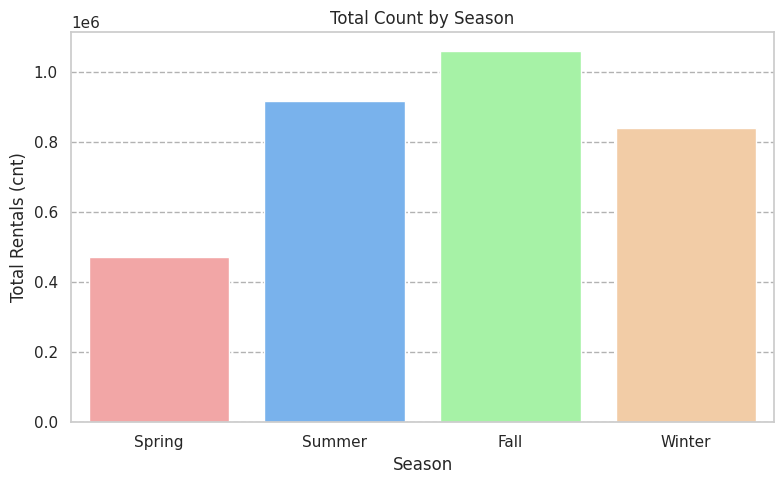

In [74]:

# Menentukan warna untuk setiap bar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Spring, Summer, Fall, Winter

# Menyeting tema Seaborn
sns.set_theme(style="whitegrid")  # Set theme for grid background

# Membuat bar plot dengan warna berbeda untuk setiap bar
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df3['season'], y=df3['cnt'], palette=colors)

# Menambahkan label sumbu x dan y
plt.xlabel('Season')
plt.ylabel('Total Rentals (cnt)')

# Menambahkan judul
plt.title('Total Count by Season')

# Menambahkan label untuk sumbu x
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)

# Menambahkan garis bantu horizontal pada sumbu y
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.6)

# Menampilkan plot
plt.tight_layout()  # Mengatur agar label tidak terpotong
plt.show()


**Insight:**
- Jumlah orang yang merental sepeda paling banyak terdapat pada musim fall (gugur) sementara paling sedikit terdapat pada musim spring (semi)

## Analisis Lanjutan (Opsional)

<ipython-input-75-2678647aa2f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4['weathersit'], y=df4['cnt'], palette='Blues_d')  # Menggunakan palette untuk warna


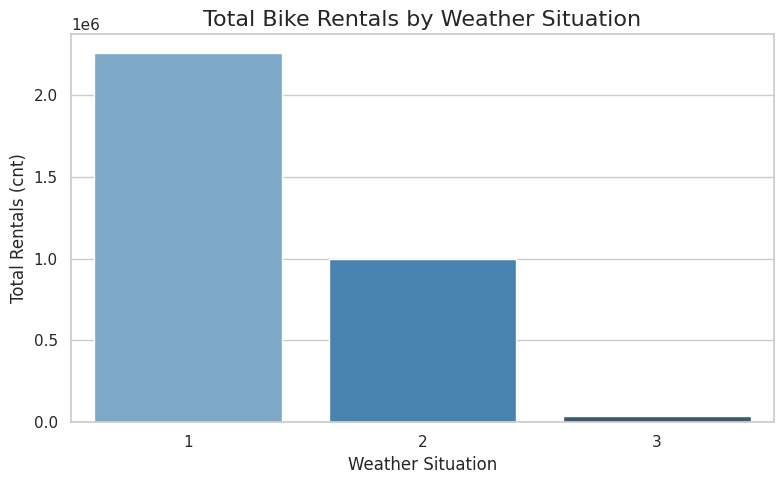

In [75]:

# Menggunakan Seaborn untuk membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=df4['weathersit'], y=df4['cnt'], palette='Blues_d')  # Menggunakan palette untuk warna

# Menambahkan label sumbu x dan y
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Total Rentals (cnt)', fontsize=12)

# Menambahkan judul
plt.title('Total Bike Rentals by Weather Situation', fontsize=16)

# Menampilkan plot dengan layout yang baik
plt.tight_layout()  # Mengatur agar label tidak terpotong
plt.show()


**Insight:**
- weathersit :
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


  Jumlah orang yang merental sepeda paling banyak yaitu ketika cuaca cerah (clear) diikuti dengan berkabut atau berawan (mist or cloudy) sementara ketika cuaca sedang bersalju dan hujan jumlah orang yang merental sepeda sangat sedikit.

## Conclusion

- Peningkatan rental sepeda dari tahun 2011 ke 2012 menunjukkan tren yang konsisten dengan kenaikan yang signifikan pada sebagian besar bulan. Di tahun 2011, jumlah penyewaan sepeda meningkat secara bertahap, mencapai puncaknya pada bulan Juni sekitar 140.000 rental. Namun, pada bulan Desember 2011, jumlahnya menurun menjadi sekitar 87.000. Memasuki 2012, jumlah penyewaan sepeda kembali meningkat dengan pesat, terutama pada bulan Maret hingga Agustus, mencapai puncaknya di bulan Agustus 2012 sekitar 210.000 rental. Secara keseluruhan, tahun 2012 menunjukkan peningkatan yang signifikan dibandingkan dengan tahun 2011,
- Pengaruh musim terhadap rental sepeda terlihat jelas dalam data yang disajikan. Musim gugur (fall) mencatatkan jumlah rental sepeda tertinggi dengan sekitar 1.000.000 rental, menunjukkan bahwa kondisi cuaca yang lebih sejuk dan nyaman pada musim ini sangat mendukung aktivitas bersepeda. Diikuti oleh musim panas (summer) dengan sekitar 900.000 rental, yang juga menjadi musim dengan permintaan tinggi, meskipun cuaca lebih panas. Musim semi (spring) dan musim dingin (winter) memiliki angka rental yang lebih rendah, dengan musim semi sekitar 450.000 rental dan musim dingin yang paling rendah dengan 800.000 rental.